# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

# Overview

The German Credit Data is a public data downloaded from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data). The dataset contains 1000 entries with 20 categorical features prepared by Prof. Hofmann. Each entry represents a customer and is classified as good or bad credit risk, according to the set of features.

## Attribute Description for German Credit Dataset

1. **Class (TARGET)** *(class)*
   - `good`       
   - `bad`

1. **Status of Existing Checking Account** *(checking_status)*
   - `x < 0 DM`       
   - `0 <= x < 200 DM`
   - `x >= 200 DM`  
   - `No checking account`

2. **Duration in Months** *(duration)*
   - The duration in months.

3. **Credit History** *(credit_history)*
   - `No credits taken / all credits paid back duly`
   - `All credits at this bank paid back duly`
   - `Existing credits paid back duly till now`
   - `Delay in paying off in the past`
   - `Critical account / other credits existing`

4. **Purpose** *(purpose)*
   - `New Car`
   - `Used Car`
   - `Furniture/equipment`
   - `Radio/television`
   - `Domestic appliances`
   - `Repairs`
   - `Education`
   - `Vacation`
   - `Retraining`
   - `Business`
   - `Others`

5. **Credit Amount** *(credit_amount)*
   - The amount of credit taken.

6. **Savings Account/Bonds** *(Qualitative)*
   - `x < 100 DM`
   - `100 <= x < 500 DM`
   - `500 <= x < 1000 DM`
   - `x >= 1000 DM`
   - `Unknown / no savings account`

7. **Present Employment Since** *(Qualitative)*
   - `Unemployed`
   - `x < 1 year`
   - `1 <= x < 4 years`:
   - `4 <= x < 7 years`
   - `x >= 7 years`

8. **Installment Rate in Percentage of Disposable Income** *(Numerical)*
   - The installment rate in percentage of disposable income.

9. **Personal Status and Sex** *(Qualitative)*
   - `Male: Divorced/separated`
   - `Female: Divorced/separated/married`
   - `Male: Single`
   - `Male: Married/widowed`
   - `Female: Single`

10. **Other Debtors / Guarantors** *(Qualitative)*
    - `None`
    - `Co-applicant`
    - `Guarantor`

11. **Present Residence Since** *(Numerical)*
    - The duration of residence in years.

12. **Property** *(Qualitative)*
    - `Real estate`
    - `Building society savings agreement / life insurance`
    - `Car or other, not in attribute 6`
    - `Unknown / no property`

13. **Age in Years** *(Numerical)*
    - The age of the individual.

14. **Other Installment Plans** *(Qualitative)*
    - `Bank`
    - `Stores`
    - `None`

15. **Housing** *(Qualitative)*
    - `Rent`
    - `Own`
    - `For free`:

16. **Number of Existing Credits at This Bank** *(Numerical)*
    - The number of credits currently held at this bank.

17. **Job** *(Qualitative)*
    - `Unemployed / unskilled - non-resident`
    - `Unskilled - resident`
    - `Skilled employee / official`
    - `Management / self-employed / highly qualified employee / officer`

18. **Number of People Being Liable to Provide Maintenance For** *(Numerical)*
    - The number of people the individual is financially responsible for.

19. **Telephone** *(Qualitative)*
    - `None`
    - `Yes, registered under the customer's name`

20. **Foreign Worker** *(Qualitative)*
    - `Yes`
    - `No`


## Data Overview

In [ ]:
data, meta = arff.loadarff('/data/dataset labkc.arff')

In [ ]:
df = pd.DataFrame(data)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'no checking',12.0,b'existing paid',b'furniture/equipment',1736.0,b'<100',b'4<=X<7',3.0,b'female div/dep/mar',b'none',...,b'real estate',31.0,b'none',b'own',1.0,b'unskilled resident',1.0,b'none',b'yes',b'good'
996,b'<0',30.0,b'existing paid',b'used car',3857.0,b'<100',b'1<=X<4',4.0,b'male div/sep',b'none',...,b'life insurance',40.0,b'none',b'own',1.0,b'high qualif/self emp/mgmt',1.0,b'yes',b'yes',b'good'
997,b'no checking',12.0,b'existing paid',b'radio/tv',804.0,b'<100',b'>=7',4.0,b'male single',b'none',...,b'car',38.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'good'
998,b'<0',45.0,b'existing paid',b'radio/tv',1845.0,b'<100',b'1<=X<4',4.0,b'male single',b'none',...,b'no known property',23.0,b'none',b'for free',1.0,b'skilled',1.0,b'yes',b'yes',b'bad'


In [ ]:
df = df.apply(lambda col: col.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x))
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [ ]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
df.describe(include=object)

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,no checking,existing paid,radio/tv,<100,1<=X<4,male single,none,car,none,own,skilled,none,yes,good
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,700


## Missing Value?

In [ ]:
df.isnull().sum()

,0
checking_status,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings_status,0
employment,0
installment_commitment,0
personal_status,0
other_parties,0


## Duplicates rows?

In [ ]:
df.duplicated().sum()

0

# Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [ ]:
data = df.copy()
# label_encoder = LabelEncoder()
# binary_columns = ['class']
# for col in binary_columns:
#     data[col] = label_encoder.fit_transform(data[col])

In [ ]:
data['class'].value_counts()

,count
class,
good,700
bad,300


In [ ]:
print(data[['credit_amount', 'age', 'duration']].describe())

       credit_amount          age     duration
count    1000.000000  1000.000000  1000.000000
mean     3271.258000    35.546000    20.903000
std      2822.736876    11.375469    12.058814
min       250.000000    19.000000     4.000000
25%      1365.500000    27.000000    12.000000
50%      2319.500000    33.000000    18.000000
75%      3972.250000    42.000000    24.000000
max     18424.000000    75.000000    72.000000


## Numerical Columns Distribution

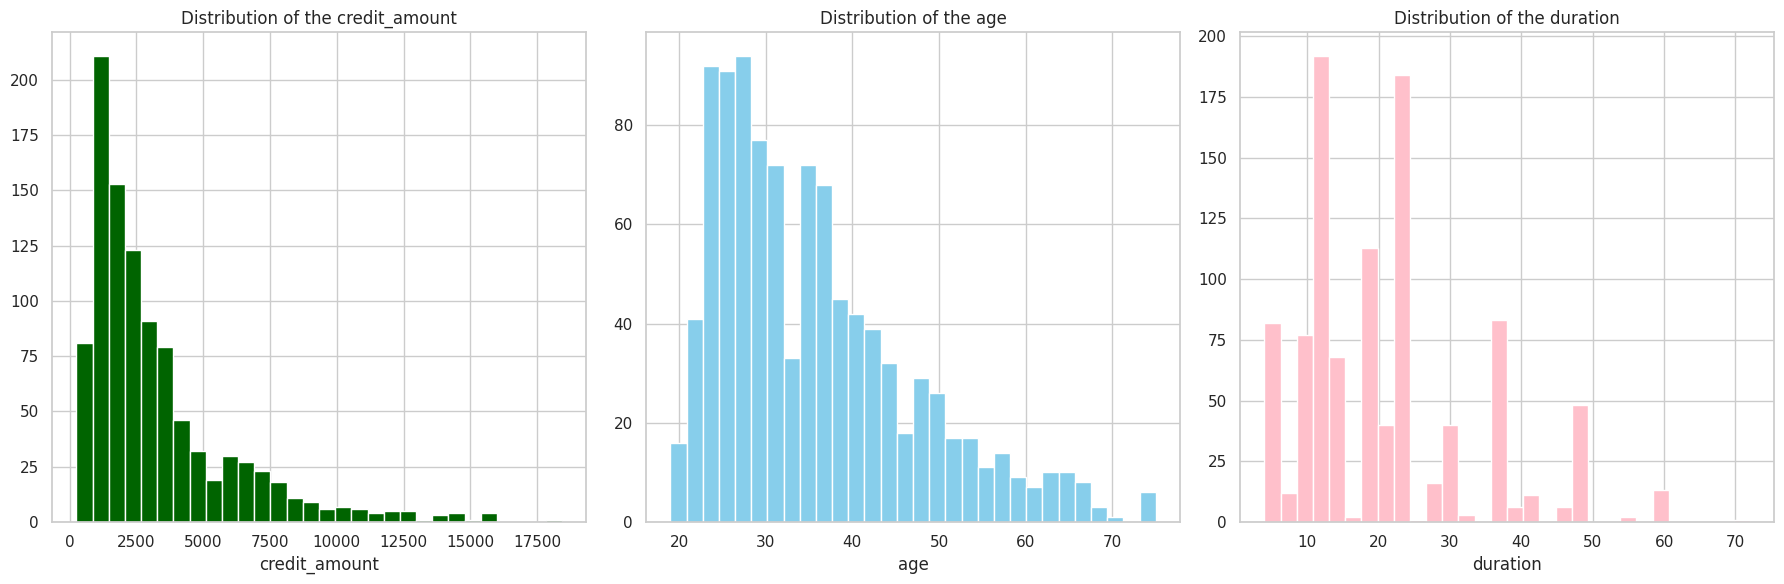

In [ ]:
def distribution_plot(x, y, m, n, columns, colors):
    plt.figure(figsize=(x, y))

    for i, (column, color) in enumerate(zip(columns, colors), 1):
        plt.subplot(m, n, i)
        plt.hist(df[column], bins=30, color=color)
        plt.title(f'Distribution of the {column}')
        plt.xlabel(column)
        plt.grid(True)

    plt.tight_layout()
    plt.show()


distribution_plot(18, 6, 1, 3, ['credit_amount', 'age', 'duration'], ['darkgreen', 'skyblue', 'pink'])

The plots above show that most of the loan seekers are between 20 and 40 years of age and the amount of the loan sought is usually below 5000 euros. Furthermore, the majority of the loans are between 4 and 30 months. Note that all three variables show marked positive skewness.

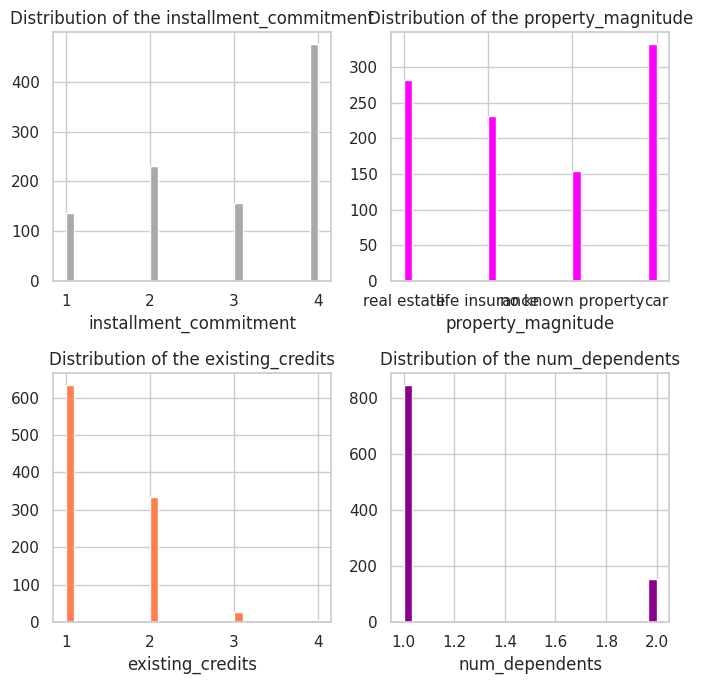

In [ ]:
distribution_plot(7, 7, 2, 2, ['installment_commitment', 'property_magnitude', 'existing_credits', 'num_dependents'], ['darkgrey', 'magenta', 'coral', 'darkmagenta'])

Dominant having **4 installment rate** in percentage of disposable income, their property either **car or real estate**, **1 or 2 existing credits** at this bank and **1 Number of people** being liable to provide maintenance

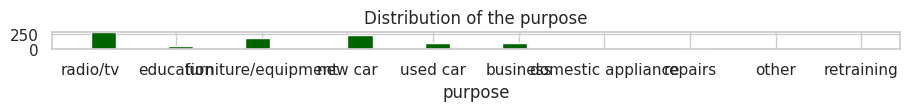

In [ ]:
distribution_plot(18, 6, 7, 2, ['purpose'], ['darkgreen'])

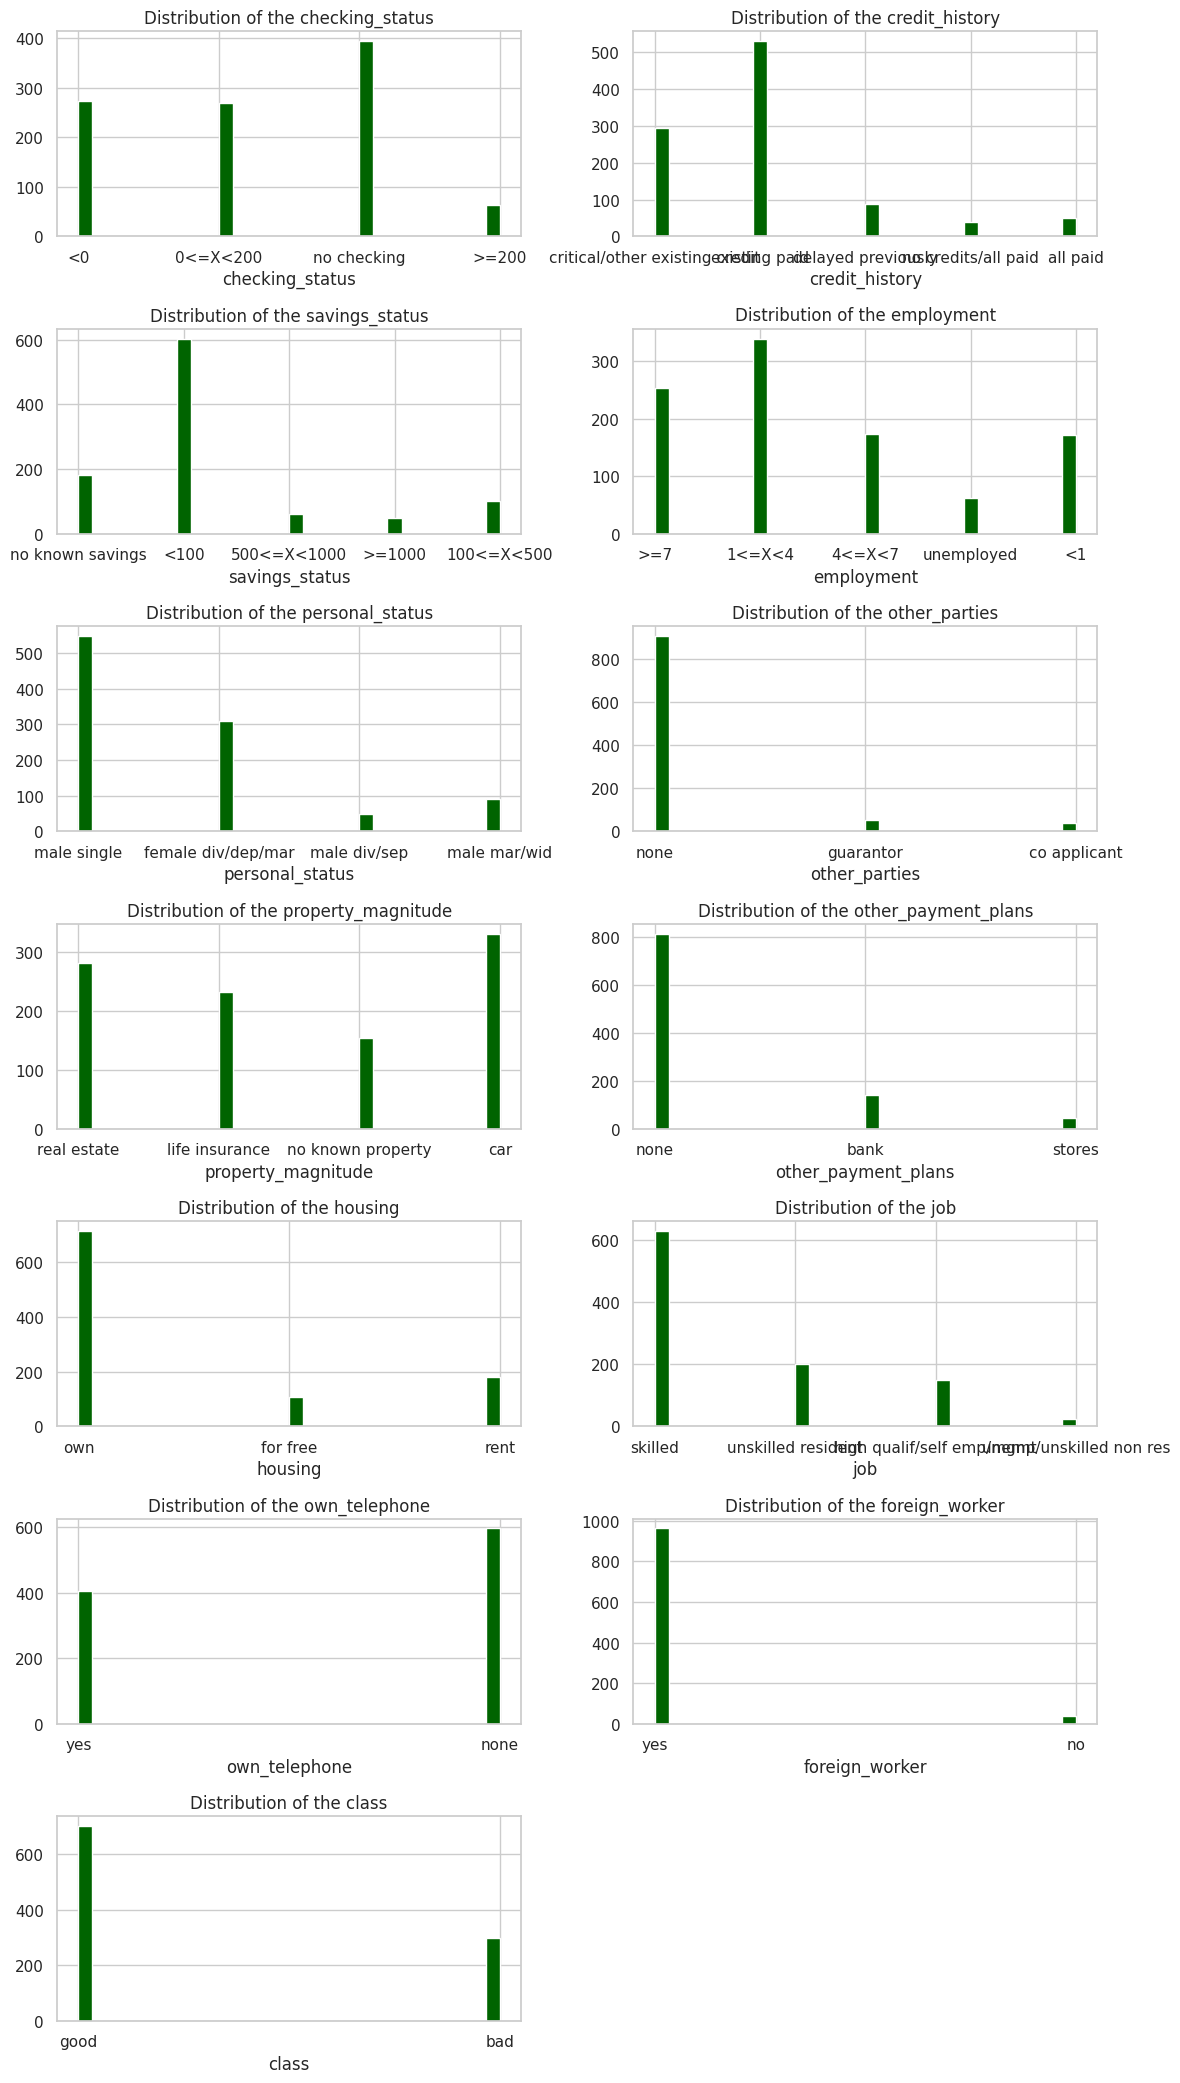

In [ ]:
distribution_plot(12, 21, 7, 2, ['checking_status', 'credit_history', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class'], ['darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen'])

## Heatmap

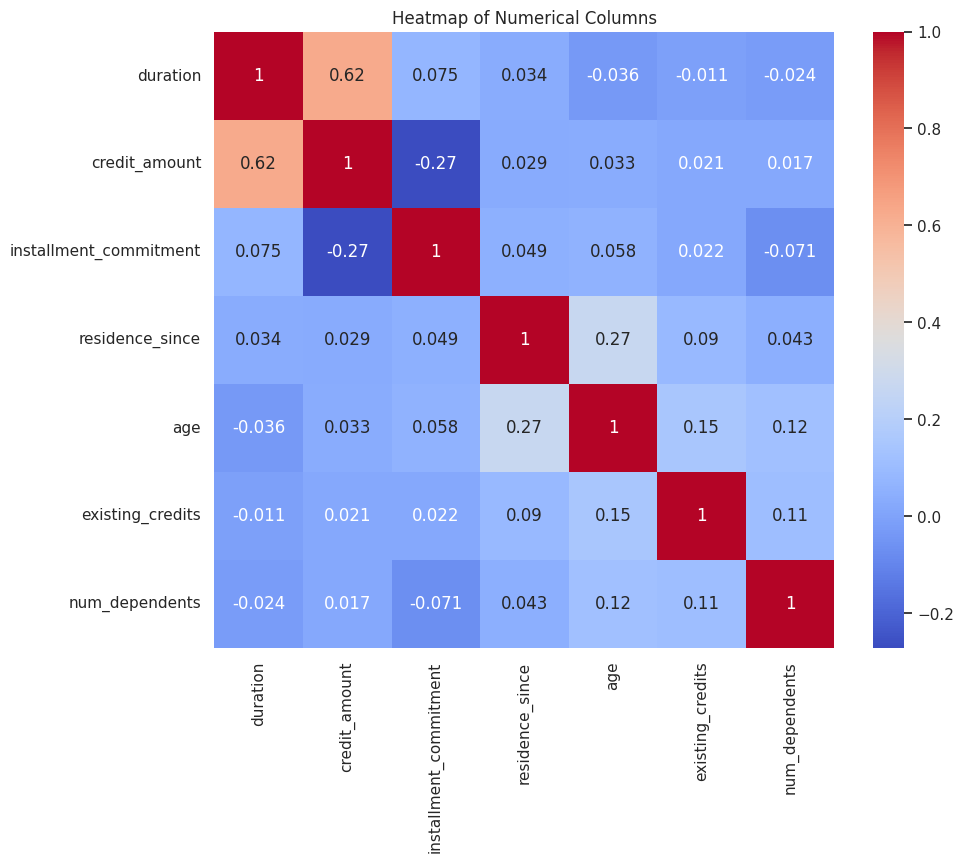

In [ ]:
numerical_cols = data.select_dtypes(include=['float', 'int']).columns

# Calculate the correlation matrix
corr_matrix = data[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Numerical Columns')
plt.show()

the amount credit amount positivly correlate with the durations of months, but credit amount negative correlate with commintment installment.
<br>
age and residence for is also correlate

## Chi Square Test

In [ ]:
def chi_square_test(col1, col2, data):
    cross_tab = pd.crosstab(data[col1], data[col2])

    cross_tab_with_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0).round(1)
    print("Cross Tabulation with Proportions:")
    print(cross_tab_with_prop)
    print()

    chi2, p, dof, ex = stats.chi2_contingency(cross_tab)

    print(f"Chi-square test statistic: {chi2:.4f}")
    print(f"p-value: {p:.4}")
    print(f"Degrees of freedom: {dof}")
    print()
    print("Expected frequencies:")
    ex_df = pd.DataFrame(ex, index=cross_tab.index, columns=cross_tab.columns)
    print(ex_df)


chi_square_test('class', 'checking_status', data)

Cross Tabulation with Proportions:
checking_status  0<=X<200   <0  >=200  no checking
class                                             
bad                   0.4  0.4    0.0          0.2
good                  0.2  0.2    0.1          0.5

Chi-square test statistic: 123.7209
p-value: 1.219e-26
Degrees of freedom: 3

Expected frequencies:
checking_status  0<=X<200     <0  >=200  no checking
class                                               
bad                  80.7   82.2   18.9        118.2
good                188.3  191.8   44.1        275.8


In [ ]:
chi_square_test('class', 'savings_status', data)

Cross Tabulation with Proportions:
savings_status  100<=X<500  500<=X<1000  <100  >=1000  no known savings
class                                                                  
bad                    0.1          0.0   0.7     0.0               0.1
good                   0.1          0.1   0.6     0.1               0.2

Chi-square test statistic: 36.0989
p-value: 2.761e-07
Degrees of freedom: 4

Expected frequencies:
savings_status  100<=X<500  500<=X<1000   <100  >=1000  no known savings
class                                                                   
bad                   30.9         18.9  180.9    14.4              54.9
good                  72.1         44.1  422.1    33.6             128.1


In [ ]:
chi_square_test('class', 'personal_status', data)

Cross Tabulation with Proportions:
personal_status  female div/dep/mar  male div/sep  male mar/wid  male single
class                                                                       
bad                             0.4           0.1           0.1          0.5
good                            0.3           0.0           0.1          0.6

Chi-square test statistic: 9.6052
p-value: 0.02224
Degrees of freedom: 3

Expected frequencies:
personal_status  female div/dep/mar  male div/sep  male mar/wid  male single
class                                                                       
bad                            93.0          15.0          27.6        164.4
good                          217.0          35.0          64.4        383.6


In [ ]:
chi_square_test('class', 'num_dependents', data)

Cross Tabulation with Proportions:
num_dependents  1.0  2.0
class                   
bad             0.8  0.2
good            0.8  0.2

Chi-square test statistic: 0.0000
p-value: 1.0
Degrees of freedom: 1

Expected frequencies:
num_dependents    1.0    2.0
class                       
bad             253.5   46.5
good            591.5  108.5


In [ ]:
chi_square_test('class', 'purpose', data)

Cross Tabulation with Proportions:
purpose  business  domestic appliance  education  furniture/equipment  \
class                                                                   
bad           0.1                 0.0        0.1                  0.2   
good          0.1                 0.0        0.0                  0.2   

purpose  new car  other  radio/tv  repairs  retraining  used car  
class                                                             
bad          0.3    0.0       0.2      0.0         0.0       0.1  
good         0.2    0.0       0.3      0.0         0.0       0.1  

Chi-square test statistic: 33.3564
p-value: 0.0001157
Degrees of freedom: 9

Expected frequencies:
purpose  business  domestic appliance  education  furniture/equipment  \
class                                                                   
bad          29.1                 3.6       15.0                 54.3   
good         67.9                 8.4       35.0                126.7   

purpose  ne

In [ ]:
chi_square_test('class', 'job', data)

Cross Tabulation with Proportions:
job    high qualif/self emp/mgmt  skilled  unemp/unskilled non res  \
class                                                                
bad                          0.2      0.6                      0.0   
good                         0.1      0.6                      0.0   

job    unskilled resident  
class                      
bad                   0.2  
good                  0.2  

Chi-square test statistic: 1.8852
p-value: 0.5966
Degrees of freedom: 3

Expected frequencies:
job    high qualif/self emp/mgmt  skilled  unemp/unskilled non res  \
class                                                                
bad                         44.4    189.0                      6.6   
good                       103.6    441.0                     15.4   

job    unskilled resident  
class                      
bad                  60.0  
good                140.0  


In [ ]:
chi_square_test('class', 'own_telephone', data)

Cross Tabulation with Proportions:
own_telephone  none  yes
class                   
bad             0.6  0.4
good            0.6  0.4

Chi-square test statistic: 1.1726
p-value: 0.2789
Degrees of freedom: 1

Expected frequencies:
own_telephone   none    yes
class                      
bad            178.8  121.2
good           417.2  282.8


This analysis reveals that checking_status, savings_status and personal_status (married/single) influence the credit rating (the chi-squared).<br>
On the other hand variables like the number of dependents, job type and owning a phone connection does not impact credit rating. Perhaps it is fair to say that people with good credit continue to maintain the status irrespective of the number of dependents to care for and whether they are employed or unemployed.

## Catplot

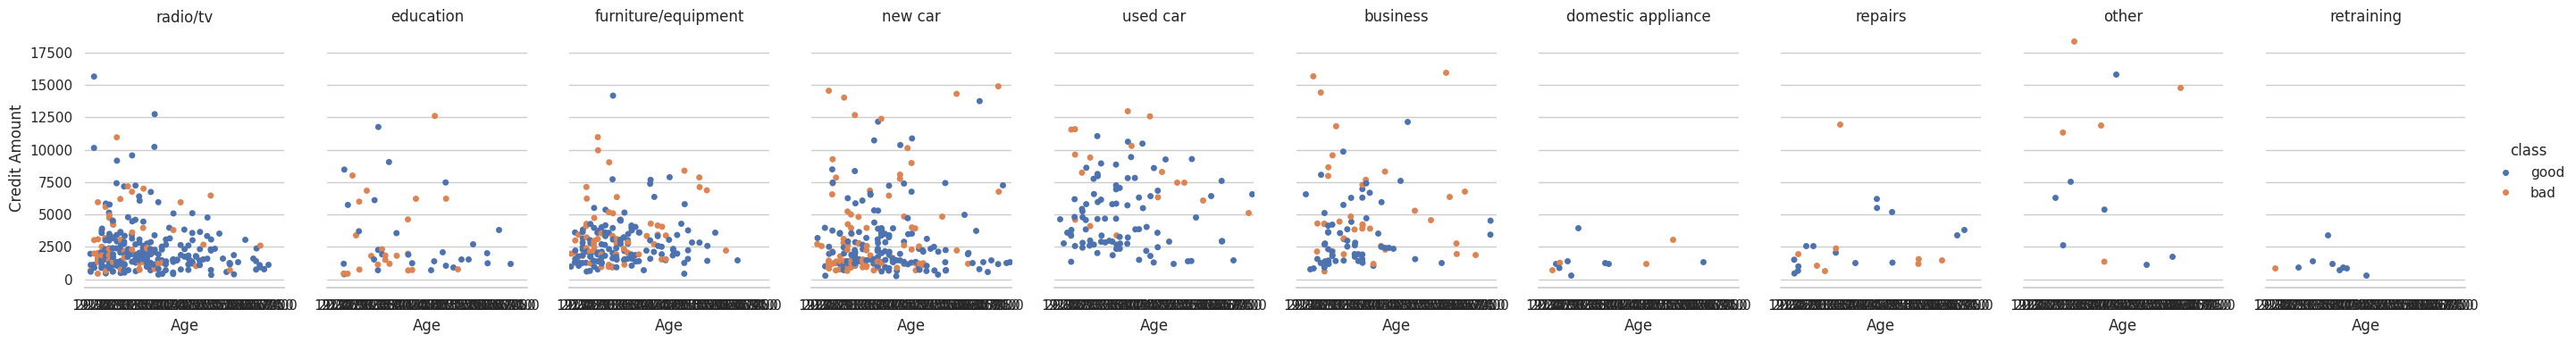

In [ ]:
# Plotting menggunakan seaborn
g = sns.catplot(
    data=data,
    x='age',
    y='credit_amount',
    hue='class',
    col='purpose',
    kind='strip',
    height=4,
    aspect=0.7,
)

# Menyesuaikan plot
g.set_axis_labels("Age", "Credit Amount")
g.set_titles("{col_name}")
g.despine(left=True)
plt.show()

It is interesting to note that most of the loans are sought for:

- new car
- used car
- furniture/equipment
- radio/television
- business


The plot also reveals that cases of default on the loan amount for the purpose of buying used cars are less than in the cases of buying new cars. Also, lower the age of the debtor higher the risk of recovering the loan amount (hence the bad credit).

## RandomForest Importance

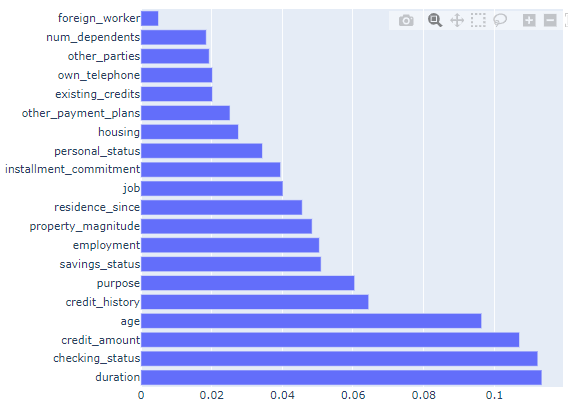

# Model

## Encoding

In [ ]:
label_encoder = LabelEncoder()
binary_columns = ['own_telephone', 'foreign_worker', 'class']
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
multi_class_columns = ['checking_status', 'credit_history', 'purpose', 'savings_status',
                       'employment', 'personal_status', 'other_parties',
                       'property_magnitude', 'other_payment_plans', 'housing', 'job']

In [ ]:
numerical_columns = ['duration', 'credit_amount', 'installment_commitment',
                     'residence_since', 'age', 'existing_credits', 'num_dependents']

In [ ]:
data_encoded = pd.get_dummies(df, columns=multi_class_columns, drop_first=True)

In [ ]:
# poly = PolynomialFeatures(degree=2, include_bias=False)
# numerical_cols = data_encoded.drop('class', axis=1).select_dtypes(include=['float', 'int']).columns
# poly_features = poly.fit_transform(data_encoded[numerical_cols])
# poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numerical_cols))
# data_encoded = pd.concat([data_encoded.drop(columns=numerical_cols), poly_df], axis=1)

## Train Test Split

In [ ]:
X = data_encoded.drop('class', axis=1)
y = data_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Base Classifier

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

pipelines = {name: Pipeline([('scaler', StandardScaler()), ('classifier', model)])
             for name, model in models.items()}

def evaluate_model(pipeline, X_train, X_test, y_train, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"Model: {pipeline.named_steps['classifier'].__class__.__name__}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
    print("="*60)

# Evaluate each model
for name, pipeline in pipelines.items():
    evaluate_model(pipeline, X_train_scaled, X_test_scaled, y_train, y_test)

Model: LogisticRegression
Confusion Matrix:
 [[ 35  24]
 [ 15 126]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.59      0.64        59
           1       0.84      0.89      0.87       141

    accuracy                           0.81       200
   macro avg       0.77      0.74      0.75       200
weighted avg       0.80      0.81      0.80       200


Accuracy Score: 0.805
Model: DecisionTreeClassifier
Confusion Matrix:
 [[ 38  21]
 [ 37 104]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.64      0.57        59
           1       0.83      0.74      0.78       141

    accuracy                           0.71       200
   macro avg       0.67      0.69      0.67       200
weighted avg       0.74      0.71      0.72       200


Accuracy Score: 0.71
Model: RandomForestClassifier
Confusion Matrix:
 [[ 28  31]
 [  9 132]]

Classification Report:
               

Feature Importance for DecisionTreeClassifier:
                                          Feature  Importance
0                                        duration    0.115090
1                                   credit_amount    0.115041
4                                             age    0.108159
11                    checking_status_no checking    0.090926
21                               purpose_radio/tv    0.035947
2                          installment_commitment    0.035085
26                            savings_status_<100    0.033781
3                                 residence_since    0.032099
19                                purpose_new car    0.028496
41                       other_payment_plans_none    0.026289
5                                existing_credits    0.024290
44                                   housing_rent    0.023565
14                   credit_history_existing paid    0.022242
17                              purpose_education    0.019540
35                    p

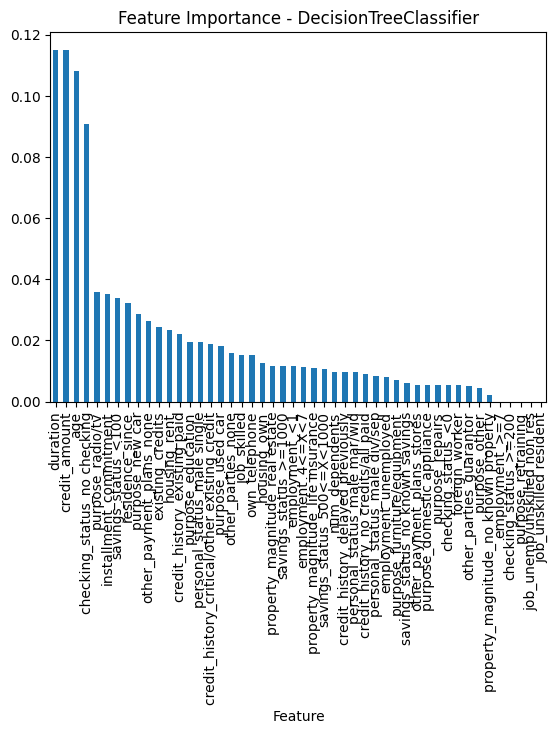

Feature Importance for RandomForestClassifier:
                                          Feature  Importance
1                                   credit_amount    0.110191
4                                             age    0.098666
0                                        duration    0.086377
11                    checking_status_no checking    0.053025
2                          installment_commitment    0.041061
9                              checking_status_<0    0.039799
3                                 residence_since    0.038723
5                                existing_credits    0.023583
19                                purpose_new car    0.023200
12  credit_history_critical/other existing credit    0.022269
41                       other_payment_plans_none    0.020959
26                            savings_status_<100    0.020908
7                                   own_telephone    0.019982
35                    personal_status_male single    0.018814
43                     

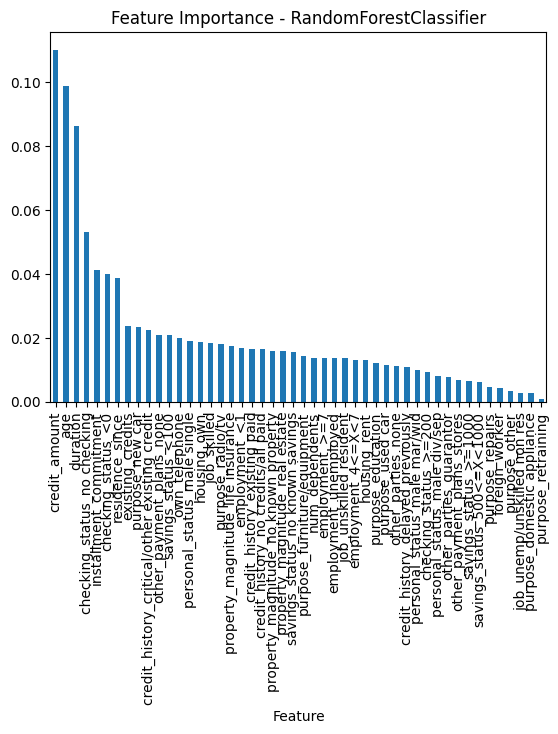

Feature Importance for XGBClassifier:
                                          Feature  Importance
11                    checking_status_no checking    0.094305
37                             other_parties_none    0.060088
15             credit_history_no credits/all paid    0.042624
36                        other_parties_guarantor    0.040907
12  credit_history_critical/other existing credit    0.034640
41                       other_payment_plans_none    0.033168
44                                   housing_rent    0.028251
29                              employment_4<=X<7    0.027741
28                savings_status_no known savings    0.024255
24                               purpose_used car    0.023933
10                          checking_status_>=200    0.023930
0                                        duration    0.023370
32                          employment_unemployed    0.023082
17                              purpose_education    0.022742
19                              

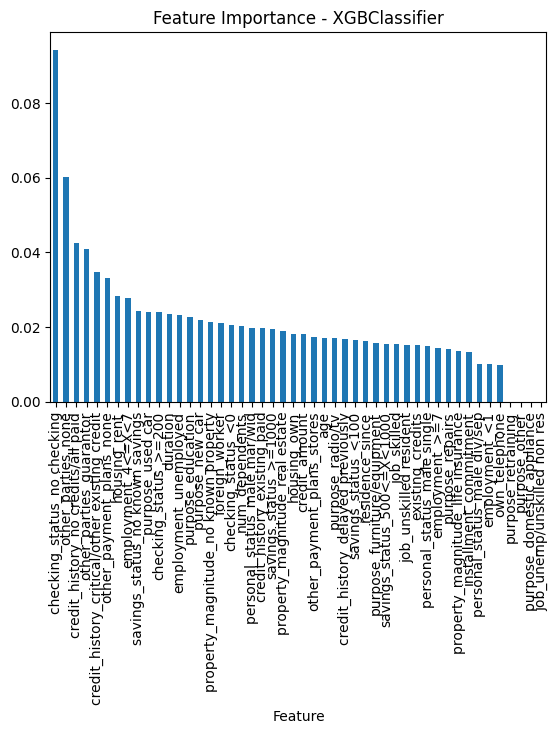

In [ ]:
def plot_feature_importance(pipeline, feature_names):
    model = pipeline.named_steps['classifier']
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)

        print(f"Feature Importance for {model.__class__.__name__}:")
        print(importance_df)

        importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
        plt.title(f"Feature Importance - {model.__class__.__name__}")
        plt.show()

for name, pipeline in pipelines.items():
    plot_feature_importance(pipeline, X_train.columns)

## Hyperparameter

In [ ]:
param_grids = {
    "Logistic Regression": {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l2']
    },
    "Decision Tree": {
        'classifier__max_depth': [3, 5, 7, 10],
        'classifier__min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 3, 5, 10, 20, 30]
    },
    "XGBoost": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    }
}

In [ ]:
def cross_validate_logistic_regression(pipeline, X_train, y_train, cv):
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    return np.mean(cv_scores)

def cross_validate_decision_tree(pipeline, X_train, y_train, cv):
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    return np.mean(cv_scores)

def cross_validate_random_forest(pipeline, X_train, y_train, cv):
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    return np.mean(cv_scores)

def cross_validate_xgboost(pipeline, X_train, y_train, cv):
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    return np.mean(cv_scores)


Logistic Regression - Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Cross-Validation Mean Accuracy: 0.7438
Confusion Matrix:
 [[ 32  27]
 [ 13 128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.54      0.62        59
           1       0.83      0.91      0.86       141

    accuracy                           0.80       200
   macro avg       0.77      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200

Test Set Accuracy Score: 0.8000


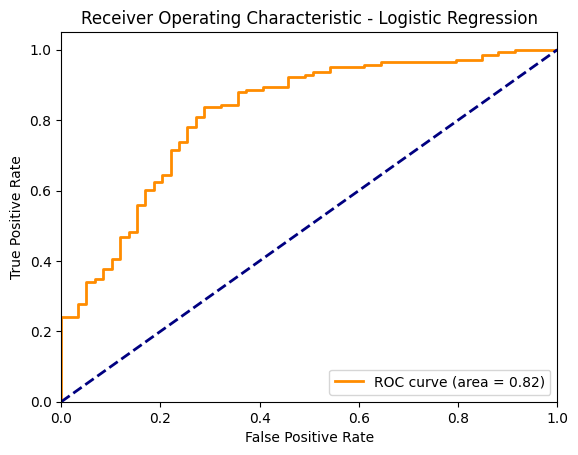


Decision Tree - Best Parameters: {'classifier__max_depth': 3, 'classifier__min_samples_split': 2}
Cross-Validation Mean Accuracy: 0.6763
Confusion Matrix:
 [[ 24  35]
 [ 13 128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.41      0.50        59
           1       0.79      0.91      0.84       141

    accuracy                           0.76       200
   macro avg       0.72      0.66      0.67       200
weighted avg       0.74      0.76      0.74       200

Test Set Accuracy Score: 0.7600


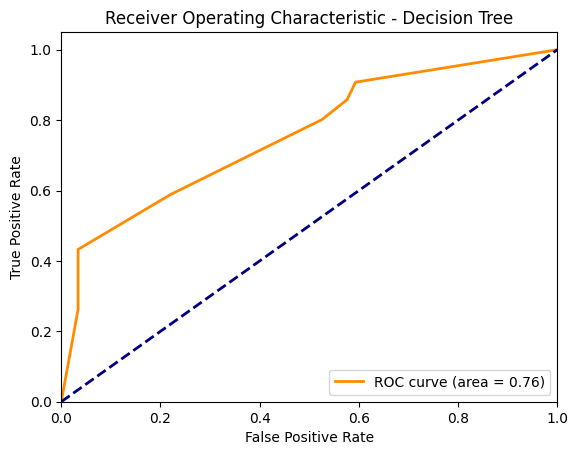


Random Forest - Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Cross-Validation Mean Accuracy: 0.7612
Confusion Matrix:
 [[ 23  36]
 [  5 136]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.39      0.53        59
           1       0.79      0.96      0.87       141

    accuracy                           0.80       200
   macro avg       0.81      0.68      0.70       200
weighted avg       0.80      0.80      0.77       200

Test Set Accuracy Score: 0.7950


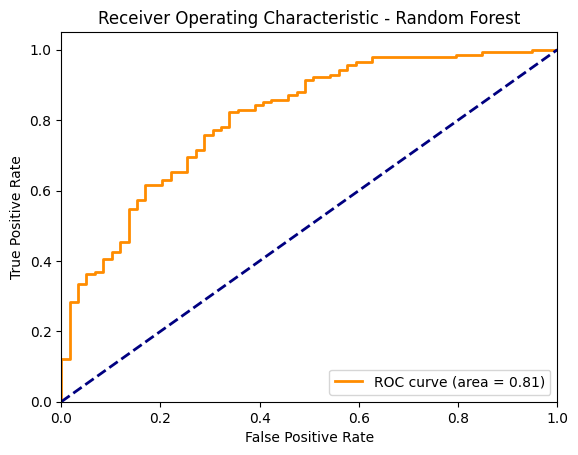


XGBoost - Best Parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Cross-Validation Mean Accuracy: 0.7612
Confusion Matrix:
 [[ 27  32]
 [ 12 129]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.46      0.55        59
           1       0.80      0.91      0.85       141

    accuracy                           0.78       200
   macro avg       0.75      0.69      0.70       200
weighted avg       0.77      0.78      0.76       200

Test Set Accuracy Score: 0.7800


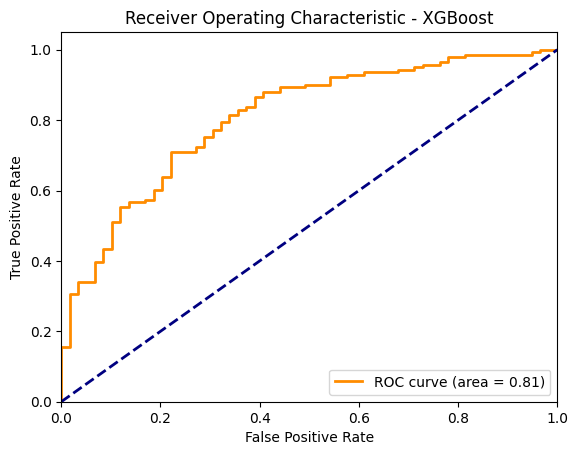

In [ ]:
best_models = {}
model_performance = []
cv = 5

for name, model in models.items():
    pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', model)])

    grid_search = GridSearchCV(pipeline, param_grids[name], cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    if name == "Logistic Regression":
        mean_cv_score = cross_validate_logistic_regression(best_model, X_train, y_train, cv)
    elif name == "Decision Tree":
        mean_cv_score = cross_validate_decision_tree(best_model, X_train, y_train, cv)
    elif name == "Random Forest":
        mean_cv_score = cross_validate_random_forest(best_model, X_train, y_train, cv)
    elif name == "XGBoost":
        mean_cv_score = cross_validate_xgboost(best_model, X_train, y_train, cv)

    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    model_performance.append((name, accuracy, mean_cv_score, grid_search.best_params_))

    print(f"\n{name} - Best Parameters: {grid_search.best_params_}")
    print(f"Cross-Validation Mean Accuracy: {mean_cv_score:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Test Set Accuracy Score: {accuracy:.4f}")

    if hasattr(best_model.named_steps['classifier'], "predict_proba"):
        y_pred_prob = best_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {name}')
        plt.legend(loc="lower right")
        plt.show()

## Cross Validation

In [ ]:
best_model_name, _, best_cv_score, best_params = max(model_performance, key=lambda item: item[2])
print(f"\nBest Model: {best_model_name} with Cross-Validation Accuracy: {best_cv_score:.4f} and Parameters: {best_params}")


Best Model: Random Forest with Cross-Validation Accuracy: 0.7612 and Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}


# Conclusion

 RandomForest achieved the highest score with a cross-validation accuracy of 0.7612,
using the parameters {'classifier__max_depth': 10, 'classifier__n_estimators': 100}.<br>

Confusion Matrix:<br>
[[ 23  36]<br>
 [  5 136]]<br>

Even tho Logistic have overall slightly better result, RF model have better performs because it tends to incorrectly classify good customers as bad more often than the other way around.

# Reference

DiscoverData. (n.d.). German credit data [german-credit-data]. GitHub. https://github.com/discoverdata/german-credit-data
